In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc,precision_score

In [52]:
hotel=pd.read_csv("hotel.csv")

In [53]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [54]:
hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [55]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [56]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Treat all Missing Data

In [58]:
hotel['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [59]:
hotel['children'].fillna(0,inplace=True)

In [60]:
hotel['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [61]:
hotel['country'].fillna('PRT',inplace=True)

Not possible to guess these Id's

In [62]:
hotel.drop(['agent','company'],axis=1,inplace=True)

In [63]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [64]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

No more null values

Barplot to show no of cancellations

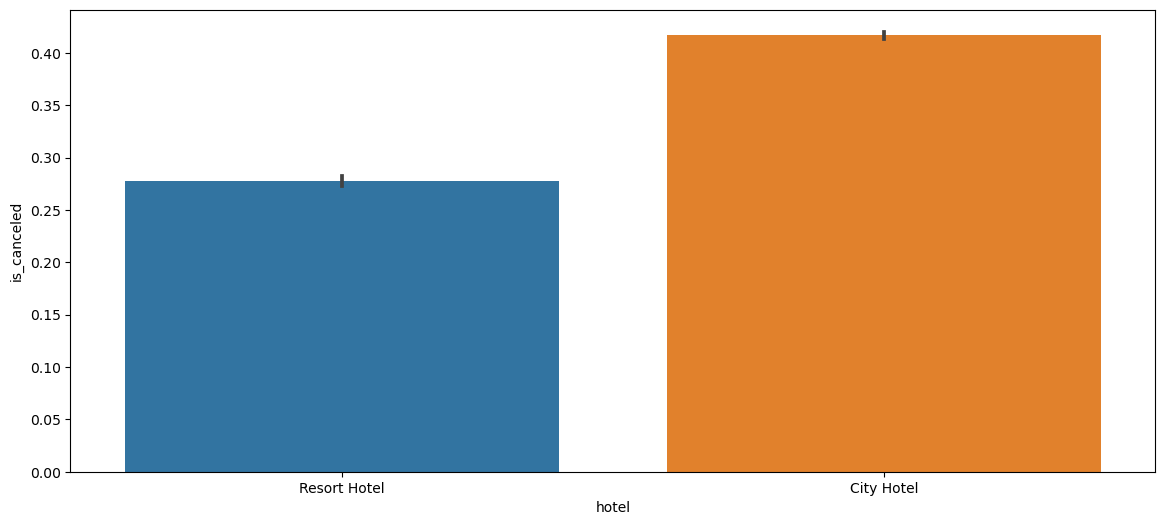

In [65]:
plt.figure(figsize=(14,6))
sns.barplot(x='hotel',y='is_canceled',data=hotel)
plt.show()

Deposit type vs Cancellations

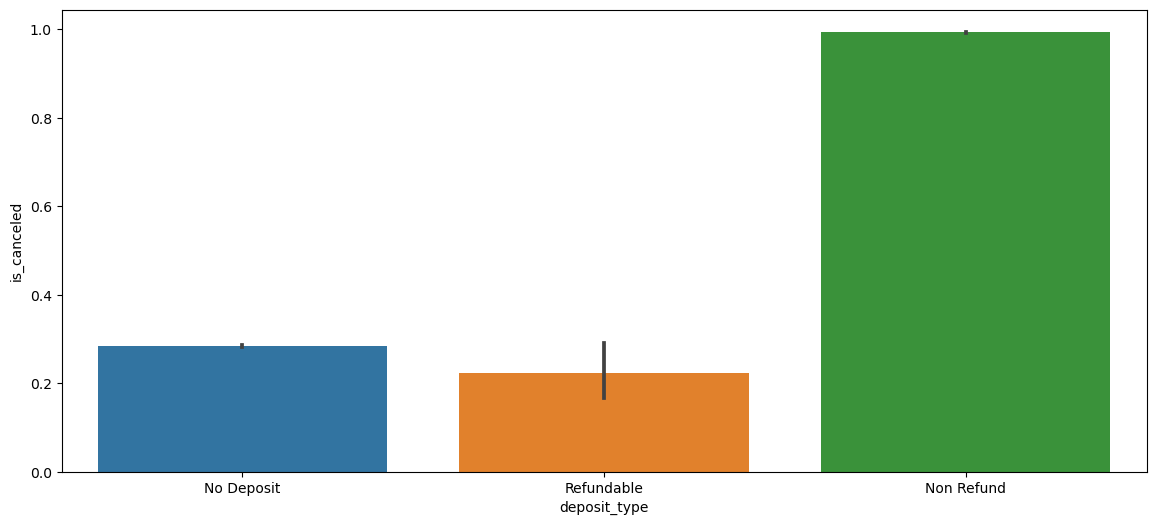

In [66]:
plt.figure(figsize=(14,6))
sns.barplot(x='deposit_type',y='is_canceled',data=hotel)
plt.show()

Booking per year

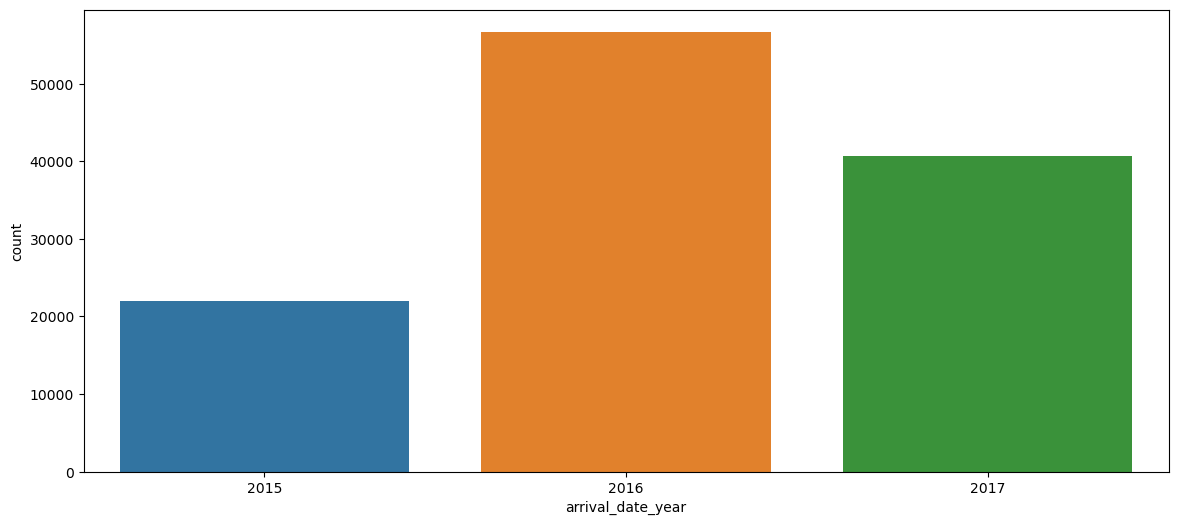

In [67]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_year',data=hotel)
plt.show()

Booking per month

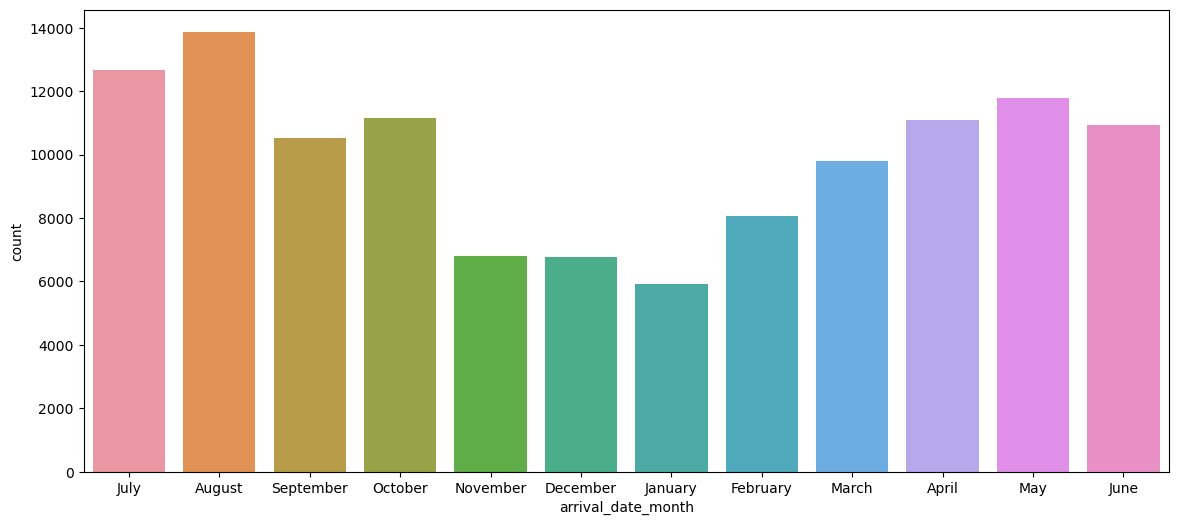

In [68]:
plt.figure(figsize=(14,6))
sns.countplot(x='arrival_date_month',data=hotel)
plt.show()

Booking on Week days

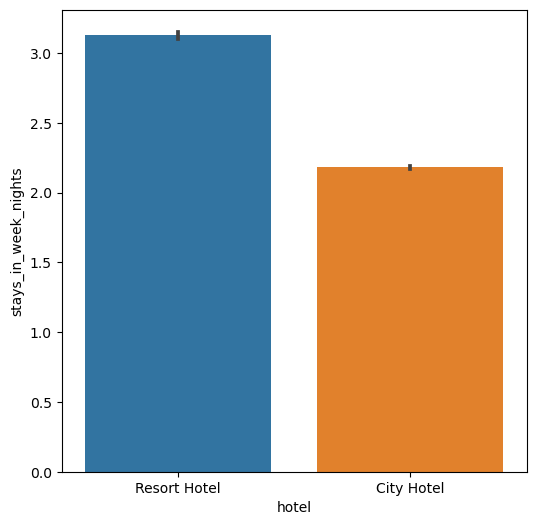

In [69]:
plt.figure(figsize=(6,6))
sns.barplot(x='hotel',y='stays_in_week_nights',data=hotel)
plt.show()

Booking on weekends

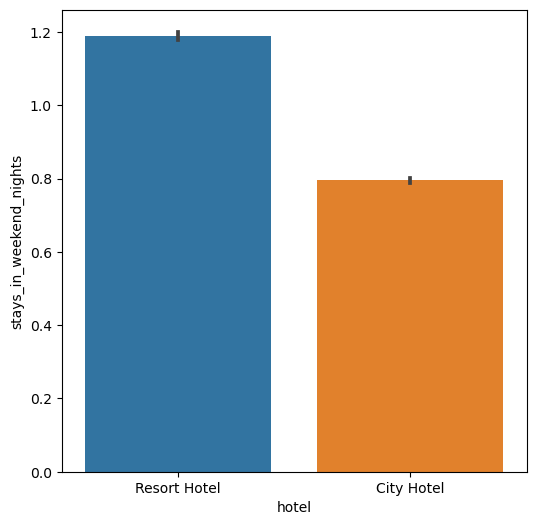

In [70]:
plt.figure(figsize=(6,6))
sns.barplot(x='hotel',y='stays_in_weekend_nights',data=hotel)
plt.show()

Feature Importance

In [71]:
hotel.corr()

C:\Users\kp881\AppData\Local\Temp\ipykernel_23284\2851777828.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotel.corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


C:\Users\kp881\AppData\Local\Temp\ipykernel_23284\3282431478.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hotel.corr())


<Axes: >

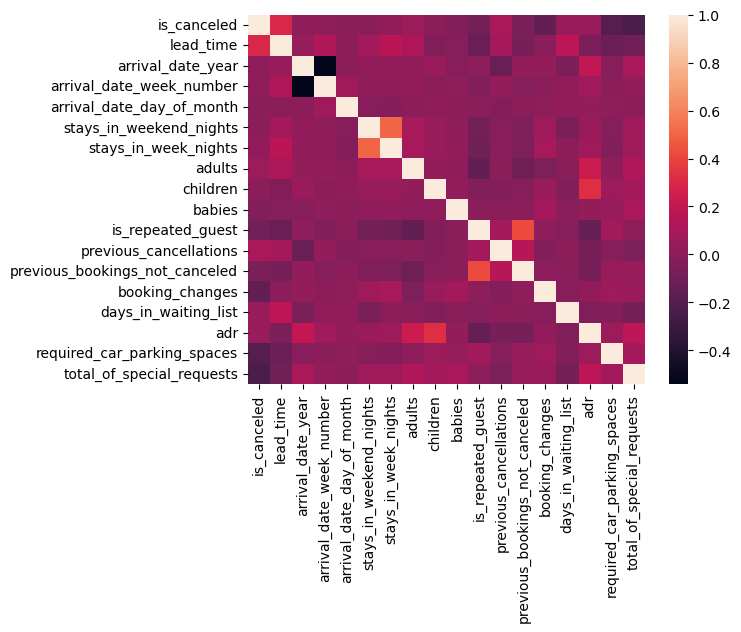

In [72]:
sns.heatmap(hotel.corr())

C:\Users\kp881\AppData\Local\Temp\ipykernel_23284\9759177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hotel.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')


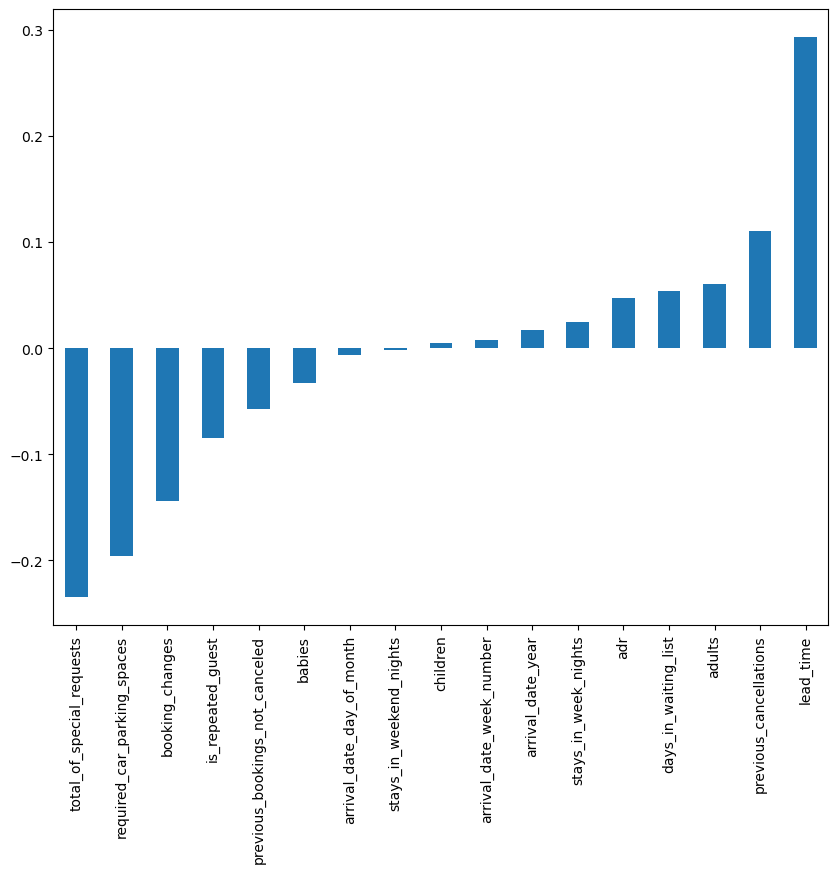

In [73]:
plt.figure(figsize=(10,8))
hotel.corr()['is_canceled'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [74]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [75]:
hotel = hotel.drop(['meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date_month'], axis=1)
hotel = pd.concat([hotel, 
                 
                 pd.get_dummies(hotel['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(hotel['market_segment'], drop_first=True),
              
                 ], axis=1)
hotel = hotel.drop(['hotel','arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

KeyError: 'arrival_date_month'

In [76]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,Direct,0,0,0,3,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,Direct,0,0,0,4,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,Direct,0,0,0,0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,Corporate,0,0,0,0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,TA/TO,0,0,0,0,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,35,30,2,5,2,0.0,...,TA/TO,0,0,0,0,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,35,31,2,5,3,0.0,...,TA/TO,0,0,0,0,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,35,31,2,5,2,0.0,...,TA/TO,0,0,0,0,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,35,31,2,5,2,0.0,...,TA/TO,0,0,0,0,0,Transient,104.40,0,0


In [77]:
hotel['hotel'] = hotel['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
hotel["hotel"]

0         0
1         0
2         0
3         0
4         0
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: hotel, Length: 119390, dtype: int64

In [78]:
hotel['market_segment'] = hotel['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

hotel['distribution_channel'] = hotel['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

hotel['customer_type'] = hotel['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

hotel['arrival_date_year'] = hotel['arrival_date_year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,0,27,1,0,0,2,0.0,...,0,0,0,0,3,0,0,0.0,0,0
1,0,0,737,0,27,1,0,0,2,0.0,...,0,0,0,0,4,0,0,0.0,0,0
2,0,0,7,0,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,75.0,0,0
3,0,0,13,0,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,75.0,0,0
4,0,0,14,0,27,1,0,2,2,0.0,...,2,0,0,0,0,0,0,98.0,0,1


normalize and test split

In [133]:
hotel['lead_time'] = np.log(hotel['lead_time'] + 1)
hotel['arrival_date_week_number'] = np.log(hotel['arrival_date_week_number'] + 1)
hotel['arrival_date_day_of_month'] = np.log(hotel['arrival_date_day_of_month'] + 1)


In [134]:
X = hotel.iloc[:].values
y = hotel["is_canceled"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [82]:
X_train

array([[  1.        ,   1.        ,   5.64897424, ...,  96.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        ,   5.69035945, ..., 249.        ,
          0.        ,   0.        ],
       [  1.        ,   1.        ,   3.04452244, ..., 120.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   1.        ,   2.77258872, ...,  43.        ,
          0.        ,   1.        ],
       [  1.        ,   1.        ,   5.03043792, ..., 105.        ,
          0.        ,   0.        ],
       [  1.        ,   1.        ,   5.75257264, ...,  68.66      ,
          0.        ,   0.        ]])

In [83]:
y_train

58830    1
13413    1
68960    1
29829    0
39169    0
        ..
84348    0
56889    1
18987    1
66637    1
61824    1
Name: is_canceled, Length: 83573, dtype: int64

In [84]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
confusion = confusion_matrix(y_test, y_pred_lr)


print(f"Accuracy Score of Logistic Regression is : {accuracy}")
print(f"Confusion Matrix : \n{confusion}")


Accuracy Score of Logistic Regression is : 1.0
Confusion Matrix : 
[[22581     0]
 [    0 13236]]


In [136]:
X_train=pd.DataFrame(X_train)

In [119]:
num_cols=X_train._get_numeric_data().columns

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '9'}>],
       [<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>],
       [<Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>, <Axes: title={'center': '18'}>,
        <Axes: title={'center': '19'}>],
       [<Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

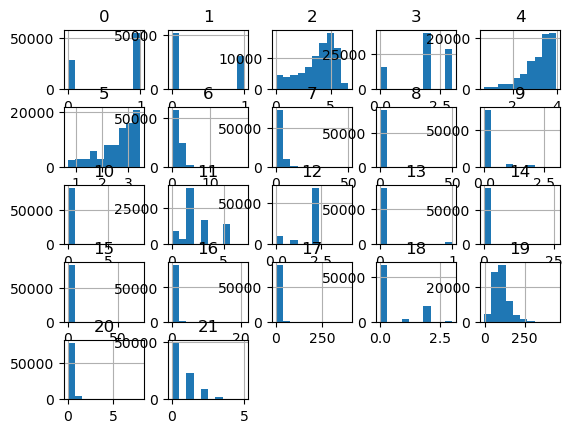

In [120]:
X_train[num_cols].hist()

In [121]:
from sklearn.preprocessing import power_transform

In [90]:
num_cols[["lead_time","arrival_date_week_number"]]=power_transform(num_cols[["lead_time","arrival_date_week_number"]],method="box-cox")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [122]:
from scipy import stats
for column in num_cols:
    hotel["lead_time"],_ = stats.boxcox(hotel["lead_time"] + 1)

<Axes: >

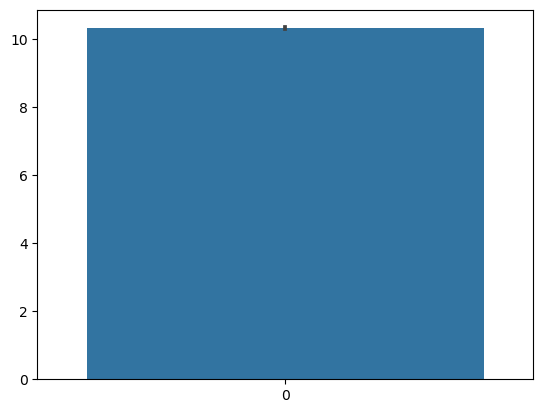

In [123]:
sns.barplot(hotel["lead_time"])

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)


In [142]:
accuracy

1.0

In [143]:
conf

array([[22496,     0],
       [    0, 13321]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


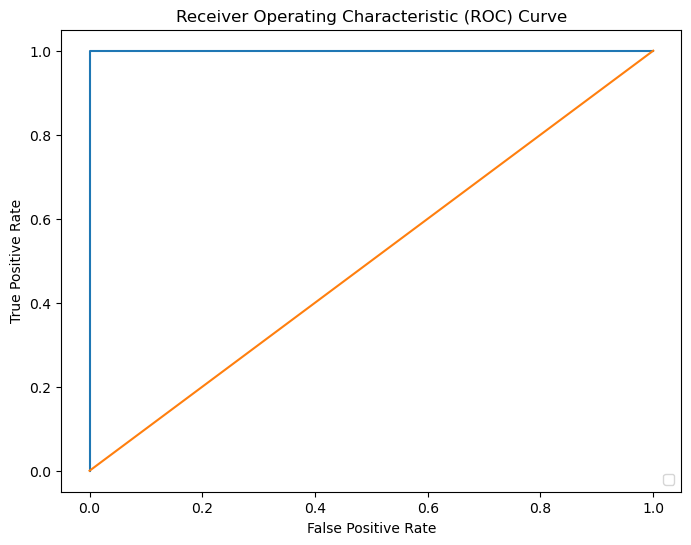

1.0


In [144]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rd_clf )
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print(roc_auc)

ROC AUC = 1

Grid Search

In [146]:
from sklearn.model_selection import GridSearchCV

In [149]:
parameter=rd_clf.get_params()

In [151]:
k=5



In [153]:
grid_search = GridSearchCV(rd_clf,parameter, cv = k, scoring = "roc_auc")
grid_search.fit(X_train, y_train)

TypeError: Parameter grid for parameter 'bootstrap' needs to be a list or a numpy array, but got True (of type bool) instead. Single values need to be wrapped in a list with one element.

XGBoost

In [156]:
from xgboost import XGBClassifier

In [167]:
xgb = XGBClassifier(max_depth=13,n_estimators=300,learning_rate=0.5)

xgb.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)

In [168]:
precision_score_xgb =  precision_score(y_test, y_pred_xgbc)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgbc)
print('The precision score  is = ',(precision_score_xgbc * 100), '%')
print('The accuracy score is = ',(accuracy_score_xgbc * 100), '%')
print (classification_report(y_test,y_pred_xgbc))

The precision score  is =  100.0 %
The accuracy score is =  100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22496
           1       1.00      1.00      1.00     13321

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817

